In [87]:
import pandas as pd 
import numpy as np 
import glob
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../twitter_data_train.csv')
test = pd.read_csv('../twitter_data_test.csv')

In [3]:
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_use_background_image,profile_background_tile,protected,verified,description,account_type,tweets_list,tweet_frequency,number_of_tags,number_of_mentions,tweet_weekend_frequency,tweet_weekday_frequency,following_to_followers_ratio,username_length,screen_name_length,username_spec_char_count,screen_name_spec_char_count,has_url,tweets_list_processed,description_processed,tweets_0,tweets_1,tweets_2,tweets_3,tweets_4,tweets_5,tweets_6,tweets_7,tweets_8,tweets_9,tweets_10,tweets_11,tweets_12,tweets_13,tweets_14,tweets_15,tweets_16,tweets_17,tweets_18,tweets_19,tweets_20,tweets_21,tweets_22,tweets_23,tweets_24,tweets_25,tweets_26,tweets_27,tweets_28,tweets_29,tweets_30,tweets_31,tweets_32,tweets_33,tweets_34,tweets_35,tweets_36,tweets_37,tweets_38,tweets_39,tweets_40,tweets_41,tweets_42,tweets_43,tweets_44,tweets_45,tweets_46,tweets_47,tweets_48,tweets_49,tweets_50,tweets_51,tweets_52,tweets_53,tweets_54,tweets_55,tweets_56,tweets_57,tweets_58,tweets_59,tweets_60,tweets_61,tweets_62,tweets_63,tweets_64,tweets_65,tweets_66,tweets_67,tweets_68,tweets_69,tweets_70,tweets_71,tweets_72,tweets_73,tweets_74,tweets_75,tweets_76,tweets_77,tweets_78,tweets_79,tweets_80,tweets_81,tweets_82,tweets_83,tweets_84,tweets_85,tweets_86,tweets_87,tweets_88,tweets_89,tweets_90,tweets_91,tweets_92,tweets_93,tweets_94,tweets_95,tweets_96,tweets_97,tweets_98,tweets_99,description_0,description_1,description_2,description_3,description_4,description_5,description_6,description_7,description_8,description_9,description_10,description_11,description_12,description_13,description_14,description_15,description_16,description_17,description_18,description_19,description_20,description_21,description_22,description_23,description_24,description_25,description_26,description_27,description_28,description_29,description_30,description_31,description_32,description_33,description_34,description_35,description_36,description_37,description_38,description_39,description_40,description_41,description_42,description_43,description_44,description_45,description_46,description_47,description_48,description_49,description_50,description_51,description_52,description_53,description_54,description_55,description_56,description_57,description_58,description_59,description_60,description_61,description_62,description_63,description_64,description_65,description_66,description_67,description_68,description_69,description_70,description_71,description_72,description_73,description_74,description_75,description_76,description_77,description_78,description_79,description_80,description_81,description_82,description_83,description_84,description_85,description_86,description_87,description_88,description_89,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,28088585,Scott Sandler,DigiRanger1994,124434,1818,1985,7452,41,NaN,0.0,0.0,1.0,http://pbs.twimg.com/profile_images/5833438974...,1.0,1.0,NaN,NaN,"i watch a lot of TV, movies and webshows, play...",1,NaN,0.000000,0.0,0.0,0.000000,0.000000,1.091859,13,14,1,0,0,NaN,i watch a lot of TV movies and webshows play a...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

## Get to the correct data format

In [4]:
to_drop = ['screen_name', 'url', 'profile_image_url', 'description',
           'id', 'name', 'account_type', 'tweets_list', 'tweets_list_processed',
          'description_processed', 'protected', 'verified']

X_train, y_train = df.drop(to_drop, axis=1), df['account_type']

In [5]:
X_test, y_test = test.drop(to_drop, axis=1), test['account_type']

In [11]:
X_train.head()


,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,tweet_frequency,number_of_tags,number_of_mentions,tweet_weekend_frequency,tweet_weekday_frequency,following_to_followers_ratio,username_length,screen_name_length,username_spec_char_count,screen_name_spec_char_count,has_url,tweets_0,tweets_1,tweets_2,tweets_3,tweets_4,tweets_5,tweets_6,tweets_7,tweets_8,tweets_9,tweets_10,tweets_11,tweets_12,tweets_13,tweets_14,tweets_15,tweets_16,tweets_17,tweets_18,tweets_19,tweets_20,tweets_21,tweets_22,tweets_23,tweets_24,tweets_25,tweets_26,tweets_27,tweets_28,tweets_29,tweets_30,tweets_31,tweets_32,tweets_33,tweets_34,tweets_35,tweets_36,tweets_37,tweets_38,tweets_39,tweets_40,tweets_41,tweets_42,tweets_43,tweets_44,tweets_45,tweets_46,tweets_47,tweets_48,tweets_49,tweets_50,tweets_51,tweets_52,tweets_53,tweets_54,tweets_55,tweets_56,tweets_57,tweets_58,tweets_59,tweets_60,tweets_61,tweets_62,tweets_63,tweets_64,tweets_65,tweets_66,tweets_67,tweets_68,tweets_69,tweets_70,tweets_71,tweets_72,tweets_73,tweets_74,tweets_75,tweets_76,tweets_77,tweets_78,tweets_79,tweets_80,tweets_81,tweets_82,tweets_83,tweets_84,tweets_85,tweets_86,tweets_87,tweets_88,tweets_89,tweets_90,tweets_91,tweets_92,tweets_93,tweets_94,tweets_95,tweets_96,tweets_97,tweets_98,tweets_99,description_0,description_1,description_2,description_3,description_4,description_5,description_6,description_7,description_8,description_9,description_10,description_11,description_12,description_13,description_14,description_15,description_16,description_17,description_18,description_19,description_20,description_21,description_22,description_23,description_24,description_25,description_26,description_27,description_28,description_29,description_30,description_31,description_32,description_33,description_34,description_35,description_36,description_37,description_38,description_39,description_40,description_41,description_42,description_43,description_44,description_45,description_46,description_47,description_48,description_49,description_50,description_51,description_52,description_53,description_54,description_55,description_56,description_57,description_58,description_59,description_60,description_61,description_62,description_63,description_64,description_65,description_66,description_67,description_68,description_69,description_70,description_71,description_72,description_73,description_74,description_75,description_76,description_77,description_78,description_79,description_80,description_81,description_82,description_83,description_84,description_85,description_86,description_87,description_88,description_89,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,124434,1818,1985,7452,41,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.091859,13,14,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Mixed NB Approach 1 
train a gaussian NB model on all features

In [57]:
model_G = GaussianNB()
clf_G = model_G.fit(X_train, y_train)
y_pred = model_G.predict(X_test)

In [61]:
# train classification report
y_train_pred = model_G.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7004
           1       0.81      0.65      0.72      2441

    accuracy                           0.87      9445
   macro avg       0.85      0.80      0.82      9445
weighted avg       0.87      0.87      0.87      9445



In [58]:
# test classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1234
           1       0.79      0.62      0.69       433

    accuracy                           0.86      1667
   macro avg       0.83      0.78      0.80      1667
weighted avg       0.85      0.86      0.85      1667



In [60]:
y_pred_prob = model_G.predict_proba(X_test)[:, 1]
print('ROC_AUC: ', roc_auc_score(y_test, y_pred_prob))

ROC_AUC:  0.9383966971227087


## Mixed NB Approach 2
train three separate models using continuous, binary and categorical variables and then train the final model based on predictions from the first three models

In [26]:
binary_cols = ['default_profile', 'default_profile_image', 'geo_enabled', 'default_profile_image', 'profile_use_background_image',                          'profile_background_tile', 'has_url']
continuous_cols = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'tweet_frequency',    
                    'number_of_tags', 'number_of_mentions', 'tweet_weekend_frequency', 'tweet_weekday_frequency',               
                    'following_to_followers_ratio', 'username_length', 'screen_name_length', 'username_spec_char_count', 
                    'screen_name_spec_char_count']												

In [27]:
train_binary = X_train[binary_cols]
train_continuous = X_train[continuous_cols]
train_text = X_train.drop(binary_cols+continuous_cols, axis=1) 

In [29]:
test_binary = X_test[binary_cols]
test_continuous = X_test[continuous_cols]
test_text = X_test.drop(binary_cols+continuous_cols, axis=1) 

In [34]:
# ----- Fit three models -----

model_G = GaussianNB()
clf_G = model_G.fit(train_continuous, y_train)

model_M = MultinomialNB()
clf_M = model_M.fit(train_text, y_train)

model_B = BernoulliNB()
clf_B = model_B.fit(train_binary, y_train)

# ----- Get probability predictions from each model -----
# On training data
G_train_probas = model_G.predict_proba(train_continuous)
M_train_probas = model_M.predict_proba(train_text)
B_train_probas = model_B.predict_proba(train_binary)

# And on testing data
G_test_probas = model_G.predict_proba(test_continuous)
M_test_probas = model_M.predict_proba(test_text)
B_test_probas = model_B.predict_proba(test_binary)

# Combine probability prediction for class=1 from both models
X_new_train = np.c_[(G_train_probas[:,1], M_train_probas[:,1], B_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], M_test_probas[:,1], B_test_probas[:,1])] # Test


# ----- Fit Gaussian model on the X_new -----
model = GaussianNB()
clf = model.fit(X_new_train, y_train)
y_pred = model.predict(X_new_test)

In [35]:
confusion_test = confusion_matrix(y_test, y_pred)
print(confusion_test)

[[1109  125]
 [  94  339]]


In [36]:
# train classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1234
           1       0.73      0.78      0.76       433

    accuracy                           0.87      1667
   macro avg       0.83      0.84      0.83      1667
weighted avg       0.87      0.87      0.87      1667



In [48]:
# train classification report
y_train_pred = model.predict(X_new_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7004
           1       0.75      0.82      0.78      2441

    accuracy                           0.88      9445
   macro avg       0.84      0.86      0.85      9445
weighted avg       0.89      0.88      0.88      9445



In [38]:
y_pred_prob = model.predict_proba(X_new_test)[:, 1]
print('ROC_AUC: ', roc_auc_score(y_test, y_pred_prob))

ROC_AUC:  0.9243658318392282


## Hyperparameter Tuning

In [45]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

For approach 1:

In [75]:
model_grid1 = GridSearchCV(estimator = GaussianNB(), 
                            param_grid = param_grid, 
                            verbose = 1, 
                            cv = cv_method,
                            scoring = 'accuracy')
model_grid1.fit(X_train, y_train)
print('--------------------------------------------------------')
print('Best Estimator: ', model_grid1.best_estimator_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
--------------------------------------------------------
Best Estimator:  GaussianNB(var_smoothing=8.111308307896872e-07)


In [76]:
# train classification report
y_train_pred = model_grid1.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7004
           1       0.92      0.58      0.71      2441

    accuracy                           0.88      9445
   macro avg       0.90      0.78      0.82      9445
weighted avg       0.88      0.88      0.87      9445



In [77]:
# test classification report
y_pred = model_grid1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1234
           1       0.91      0.55      0.68       433

    accuracy                           0.87      1667
   macro avg       0.88      0.76      0.80      1667
weighted avg       0.87      0.87      0.86      1667



In [78]:
y_pred_prob = model_grid1.predict_proba(X_test)[:, 1]
print('ROC_AUC: ', roc_auc_score(y_test, y_pred_prob))

ROC_AUC:  0.9406893221690291


For approach 2:

In [81]:
model_grid2 = GridSearchCV(estimator = GaussianNB(), 
                            param_grid = param_grid, 
                            verbose = 1, 
                            cv = cv_method,
                            scoring = 'accuracy')
model_grid2.fit(X_new_train, y_train)
print('--------------------------------------------------------')
print('Best Estimator: ', model_grid2.best_estimator_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
--------------------------------------------------------
Best Estimator:  GaussianNB(var_smoothing=1.0)


In [82]:
# test classification report
y_pred = model_grid2.predict(X_new_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1234
           1       0.94      0.57      0.71       433

    accuracy                           0.88      1667
   macro avg       0.90      0.78      0.82      1667
weighted avg       0.89      0.88      0.87      1667



In [83]:
# train classification report
y_train_pred = model_grid2.predict(X_new_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7004
           1       0.96      0.60      0.74      2441

    accuracy                           0.89      9445
   macro avg       0.92      0.79      0.83      9445
weighted avg       0.90      0.89      0.88      9445



In [84]:
y_pred_prob = model_grid2.predict_proba(X_new_test)[:, 1]
print('ROC_AUC: ', roc_auc_score(y_test, y_pred_prob))

ROC_AUC:  0.9335531758003601


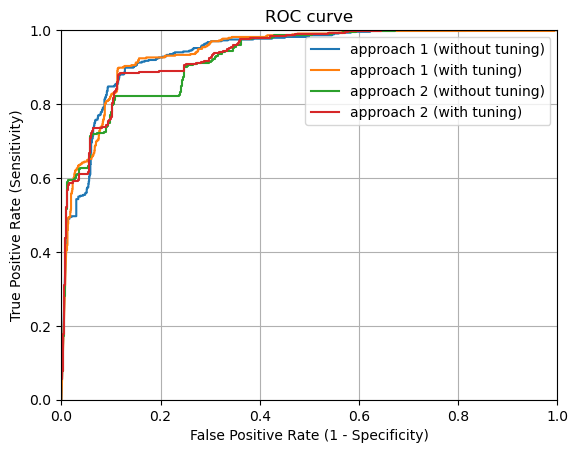

In [88]:
y_pred_prob1 = model_G.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob1)
y_pred_prob2 = model_grid1.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob2)
y_pred_prob3 = model.predict_proba(X_new_test)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob3)
y_pred_prob4 = model_grid2.predict_proba(X_new_test)[:, 1]
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_prob4)
plt.plot(fpr1, tpr1, label = "approach 1 (without tuning)")
plt.plot(fpr2, tpr2, label ="approach 1 (with tuning)")
plt.plot(fpr3, tpr3, label = "approach 2 (without tuning)")
plt.plot(fpr4, tpr4, label ="approach 2 (with tuning)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)